# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

The Global Renewable Energy Production (2000-2022) dataset gives a detailed look at how much renewable energy different countries have been producing, broken down by energy type like wind, solar, and hydro. It’s useful for anyone interested in tracking the progress of renewable energy around the world—whether that’s government officials, environmental groups, energy companies, or researchers. The dataset includes information like which countries are producing the most renewable energy, what types they’re using, and how things have changed year by year. By analyzing the data through methods like time series and mapping, you can uncover trends like which countries are leading the way, which energy sources are growing fastest, and how global renewable energy production has evolved over time. Visualizing all of this helps make the story clearer and more engaging for anyone who wants to understand the global shift toward sustainable energy.

# 3. Homework - work with your own data

In [69]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [70]:
import zipfile

# Path to the downloaded ZIP file
zip_path = '/workspaces/2025-spring-B2/global-renewable-energy-production-2000-2022.zip'

# Extracting the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/workspaces/2025-spring-B2')

# Check the extracted files
import os
print(os.listdir('/workspaces/2025-spring-B2'))


['Week6.ipynb', 'global-renewable-energy-production-2000-2022.zip', 'kaggle.json', 'Week2.ipynb', 'bank_customers.csv', '.git', 'Week13.ipynb', 'Week11.ipynb', 'IRENA_RenewableEnergy_Statistics_2000-2022.csv', 'Week7.ipynb', 'VehicleInsuranceFraud.csv', 'Week14.ipynb', 'Week8.ipynb', 'vehicle-insurance-fraud-detection.zip', 'Week1.ipynb', 'Week4.ipynb', 'Week10.ipynb', 'Week3.ipynb', 'Week9.ipynb', 'Week12.ipynb', 'Week5-concealed-answer.ipynb']


In [71]:
import pandas as pd

# Load the CSV file with a different encoding from help of GPT
df = pd.read_csv('/workspaces/2025-spring-B2/IRENA_RenewableEnergy_Statistics_2000-2022.csv', encoding='ISO-8859-1')


This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [72]:
# Get a quick overview of the dataset
df.info()

# Summary statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35193 entries, 0 to 35192
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               35193 non-null  object 
 1   Sub-region                           35193 non-null  object 
 2   Country                              35193 non-null  object 
 3   ISO3 code                            35193 non-null  object 
 4   M49 code                             35193 non-null  int64  
 5   RE or Non-RE                         35193 non-null  object 
 6   Group Technology                     35193 non-null  object 
 7   Technology                           35193 non-null  object 
 8   Producer Type                        35193 non-null  object 
 9   Year                                 35193 non-null  int64  
 10  Electricity Generation (GWh)         35193 non-null  float64
 11  Electricity Installed Capaci

,M49 code,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW)
count,35193.000000,35193.000000,3.519300e+04,3.159400e+04
mean,420.592618,2012.283437,1.440929e+04,3.452455e+03
std,252.192524,6.499073,1.148906e+05,2.715673e+04
min,4.000000,2000.000000,-5.874050e+02,1.000000e-03
25%,203.000000,2007.000000,1.168300e+01,5.000000e+00
50%,404.000000,2013.000000,2.002570e+02,5.890000e+01
75%,634.000000,2018.000000,2.383631e+03,6.325750e+02
max,894.000000,2022.000000,5.220700e+06,1.155325e+06


In [73]:
# Check for duplicate rows
df[df.duplicated()]

# Count the duplicates
df.duplicated().sum()


np.int64(0)

There are no duplicated rows

In [74]:
# Remove duplicate rows
df = df.drop_duplicates()


There are no duplicated rows to drop

In [75]:
# Check for duplicate values in a specific column (e.g., 'ID')
df['Year'].duplicated().sum()

#Duplicates in this row would be appropriate


np.int64(35170)

np.int64(35170) is the number of duplicate entries in the 'Year' column

In [76]:
# Check for missing values
df.isnull().sum()

Region                                    0
Sub-region                                0
Country                                   0
ISO3 code                                 0
M49 code                                  0
RE or Non-RE                              0
Group Technology                          0
Technology                                0
Producer Type                             0
Year                                      0
Electricity Generation (GWh)              0
Electricity Installed Capacity (MW)    3599
dtype: int64

This means there are no missing values

In [77]:
#Where Electricity Generation (GWh) is negative

df[df['Electricity Generation (GWh)'] < 0]



,Region,Sub-region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Producer Type,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW)
11994,Americas,Latin America and the Caribbean,Peru,PER,604,Total Non-Renewable,Fossil fuels,Oil,On-grid electricity,2012,-525.129,1184.113
11996,Americas,Latin America and the Caribbean,Peru,PER,604,Total Non-Renewable,Fossil fuels,Oil,On-grid electricity,2013,-587.405,1674.742
17313,Asia,South-eastern Asia,Malaysia,MYS,458,Total Renewable,Bioenergy,Biogas,On-grid electricity,2012,-1.253,4.750
17408,Asia,South-eastern Asia,Malaysia,MYS,458,Total Renewable,Bioenergy,Solid biofuels,Off-grid electricity,2016,-156.092,1243.000
17412,Asia,South-eastern Asia,Malaysia,MYS,458,Total Renewable,Bioenergy,Solid biofuels,Off-grid electricity,2017,-66.122,531.640


In [78]:

#Create new binary columns for each unique value in the categorical columns
df_encoded = pd.get_dummies(df, columns=['Region', 'Sub-region', 'Country', 'RE or Non-RE', 'Group Technology', 'Technology', 'Producer Type'])
df_encoded

,ISO3 code,M49 code,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW),Region_Africa,Region_Americas,Region_Asia,Region_Europe,Region_Oceania,...,Technology_Onshore wind energy,Technology_Other non-renewable energy,Technology_Pumped storage,Technology_Renewable hydropower,Technology_Renewable municipal waste,Technology_Solar photovoltaic,Technology_Solar thermal energy,Technology_Solid biofuels,Producer Type_Off-grid electricity,Producer Type_On-grid electricity
0,DZA,12,2000,24585.000,5459.010,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,DZA,12,2001,25781.000,5455.500,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,DZA,12,2002,26994.000,5891.010,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,DZA,12,2003,28619.400,6013.240,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,DZA,12,2004,30312.000,6305.240,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35188,TUV,798,2020,0.505,2.397,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
35189,TUV,798,2021,1.023,1.332,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
35190,TUV,798,2021,0.505,2.397,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
35191,TUV,798,2022,1.023,1.332,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

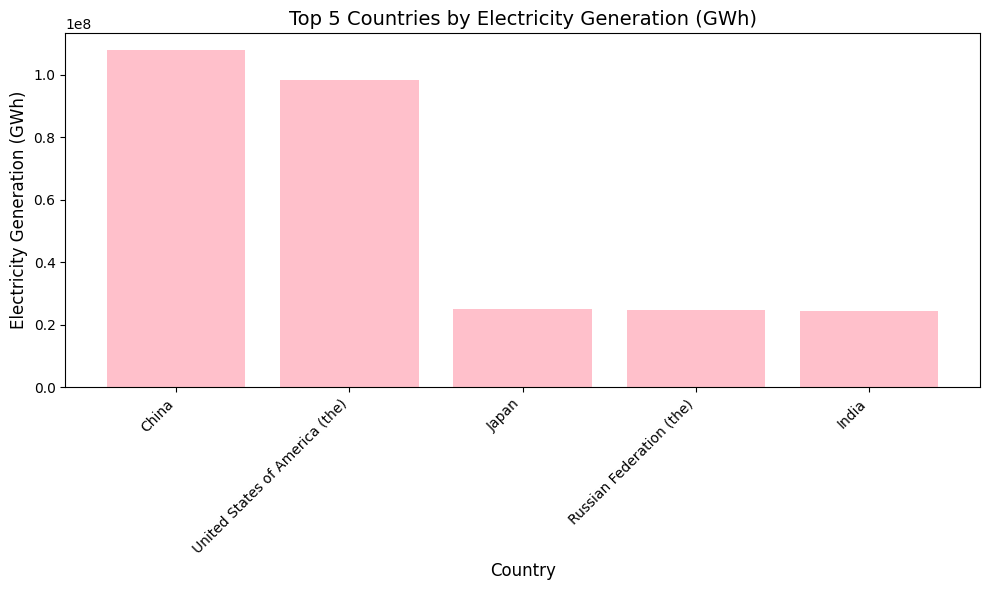

In [79]:
import matplotlib.pyplot as plt
top_countries = df.groupby('Country').agg({'Electricity Generation (GWh)': 'sum'}).sort_values(by='Electricity Generation (GWh)', ascending=False).head(5)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_countries.index, top_countries['Electricity Generation (GWh)'], color='Pink')

# Add titles and labels
plt.title('Top 5 Countries by Electricity Generation (GWh)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Electricity Generation (GWh)', fontsize=12)


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


*Here I revisted the homework with my assigned topic: Auto Insurance Fraud Detection*

In [80]:
#Dataset1
Vehicle_Insurance_Fraud_df =  pd.read_csv('/workspaces/2025-spring-B2/VehicleInsuranceFraud.csv')
Vehicle_Insurance_Fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [81]:
Vehicle_Insurance_Fraud_df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [82]:
Vehicle_Insurance_Fraud_df.isnull().sum()

if Vehicle_Insurance_Fraud_df.isnull().sum().sum() == 0:
    print("No missing values found")
else:
    print("There are missing values in the dataset")

No missing values found
